# **BANK CUSTOMER CHURN MODEL**

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
df = pd.read_csv("/content/drive/MyDrive/bank_churn.csv")

## Describe Data

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

Check Duplicate instances

In [8]:
duplicate=df[df.duplicated()]
print(duplicate.shape)

(0, 13)


### Data Encoding

In [9]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df.replace({"Geography": {"France":0, "Germany":1, "Spain":2}}, inplace=True)

In [11]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
df.replace({"Gender": {"Male" : 0, "Female":1}}, inplace=True)

In [13]:
df["Num Of Products"].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [14]:
df.replace({"Num Of Products": {1:0, 2:1, 3:1, 4:1}}, inplace=True)

In [15]:
df.loc[(df["Balance"]==0), "Churn"].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

3117 represents the number of customers who have 0 bank balance and still a customer of bank.

500 represents the number of customers who had 0 bank balance and they left the bank.

<Axes: >

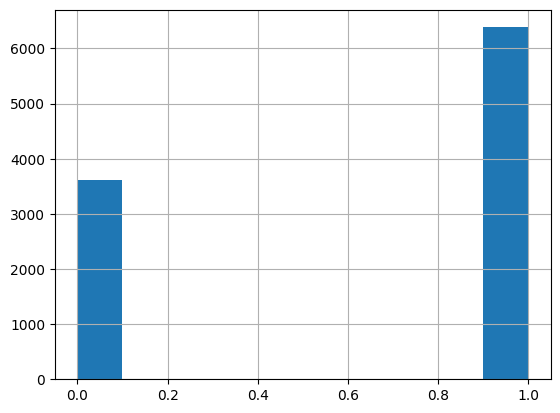

In [16]:
df["Zero Balance"] = np.where(df["Balance"]>0,1,0)
df["Zero Balance"].hist()

In [17]:
X = df.drop(["CustomerId", "Surname", "Churn"], axis=1)
Y = df["Churn"]

In [18]:
X.shape, Y.shape

((10000, 11), (10000,))

In [19]:
df["Churn"].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

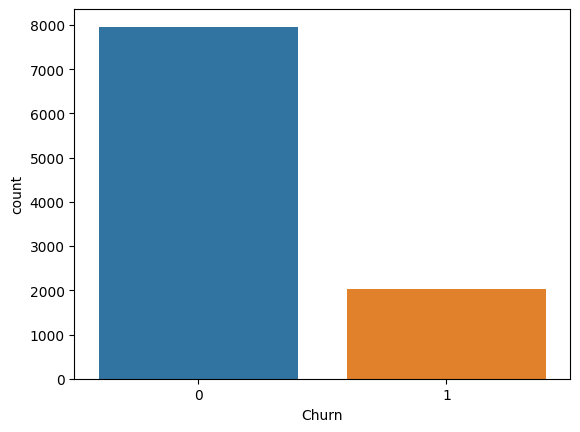

In [20]:
sns.countplot(x="Churn", data=df)

## **RESAMPLING OF DATA**

### Random Undersampling

In [21]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, Y_rus = rus.fit_resample(X, Y)

In [22]:
X_rus.shape, Y_rus.shape

((4074, 11), (4074,))

### Random Oversampling

In [23]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, Y_ros = ros.fit_resample(X, Y)

In [24]:
X_ros.shape, Y_ros.shape

((15926, 11), (15926,))

## Splitting dataset

In [25]:
from sklearn.model_selection import train_test_split

Split Original Dataset

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

Split Random undersampled dataset

In [27]:
xtrain_rus, xtest_rus, ytrain_rus, ytest_rus = train_test_split(X_rus, Y_rus, test_size=0.2, random_state=42)

Split Random oversampled dataset

In [28]:
xtrain_ros, xtest_ros, ytrain_ros, ytest_ros = train_test_split(X_ros, Y_ros, test_size=0.2, random_state=42)

## Standardization

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()

Standardize Original Data

In [31]:
xtrain[['CreditScore', 'Age',
        'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(xtrain[['CreditScore', 'Age',
                                                                             'Tenure', 'Balance', 'Estimated Salary']])

In [32]:
xtest[['CreditScore', 'Age',
        'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(xtest[['CreditScore', 'Age',
                                                                             'Tenure', 'Balance', 'Estimated Salary']])

Standardize Random Undersampled Data

In [33]:
xtrain_rus[['CreditScore', 'Age',
        'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(xtrain_rus[['CreditScore', 'Age',
                                                                             'Tenure', 'Balance', 'Estimated Salary']])

In [34]:
xtest_rus[['CreditScore', 'Age',
        'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(xtest_rus[['CreditScore', 'Age',
                                                                             'Tenure', 'Balance', 'Estimated Salary']])

Standardize Random Oversampled Data

In [35]:
xtrain_ros[['CreditScore', 'Age',
        'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(xtrain_ros[['CreditScore', 'Age',
                                                                             'Tenure', 'Balance', 'Estimated Salary']])

In [36]:
xtest_ros[['CreditScore', 'Age',
        'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(xtest_ros[['CreditScore', 'Age',
                                                                             'Tenure', 'Balance', 'Estimated Salary']])

## Machine Learning Model

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
svm = SVC()

Training & Tesing on Original Dta

In [39]:
svm.fit(xtrain, ytrain)
y_pred = svm.predict(xtest)

print("Accuracy : ", accuracy_score(ytest, y_pred))
print("Confusion Matrix : ")
print(confusion_matrix(ytest, y_pred))
print("Classification Report : ")
print(classification_report(ytest, y_pred))

Accuracy :  0.84
Confusion Matrix : 
[[1581   26]
 [ 294   99]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1607
           1       0.79      0.25      0.38       393

    accuracy                           0.84      2000
   macro avg       0.82      0.62      0.65      2000
weighted avg       0.83      0.84      0.80      2000



Training & Testing on Random Undersampled Data

In [40]:
svm.fit(xtrain_rus, ytrain_rus)
y_pred = svm.predict(xtest_rus)

print("Accuracy : ", accuracy_score(ytest_rus, y_pred))
print("Confusion Matrix : ")
print(confusion_matrix(ytest_rus, y_pred))
print("Classification Report : ")
print(classification_report(ytest_rus, y_pred))

Accuracy :  0.7374233128834355
Confusion Matrix : 
[[319 124]
 [ 90 282]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       443
           1       0.69      0.76      0.72       372

    accuracy                           0.74       815
   macro avg       0.74      0.74      0.74       815
weighted avg       0.74      0.74      0.74       815



Training & Testing on Random Oversampled Data

In [41]:
svm.fit(xtrain_ros, ytrain_ros)
y_pred = svm.predict(xtest_ros)

print("Accuracy : ", accuracy_score(ytest_ros, y_pred))
print("Confusion Matrix : ")
print(confusion_matrix(ytest_ros, y_pred))
print("Classification Report : ")
print(classification_report(ytest_ros, y_pred))

Accuracy :  0.7661644695543001
Confusion Matrix : 
[[1229  404]
 [ 341 1212]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1633
           1       0.75      0.78      0.76      1553

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186



## Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {"C" : [0.1, 1, 10],
              "gamma" : [1, 0.1, 0.01],
              "kernel" : ["rbf", "poly", "sigmoid"],
              "class_weight" : ["balanced"]}

On Original Dataset

In [44]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid.fit(xtrain, ytrain)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.0s
[CV] END .C=0.1, class_weight=balanced, gamma=1, kernel=poly; total time=   4.9s
[CV] END .C=0.1, class_weight=balanced, gamma=1, kernel=poly; total time=   6.4s
[CV] END C=0.1, class_weight=balanced, gamma=1, kernel=sigmoid; total time=   2.2s
[CV] END C=0.1, class_weight=balanced, gamma=1, kernel=sigmoid; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=poly; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=poly; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=sigmoid; total time=   1.8s
[CV] END C=0.1, class_weight=balanced,

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [45]:
print(grid.best_estimator_)

SVC(C=0.1, class_weight='balanced', gamma=1)


In [46]:
grid_pred = grid.predict(xtest)

print("Accuracy : ", accuracy_score(ytest, grid_pred))
print("Confusion Matrix : ")
print(confusion_matrix(ytest, grid_pred))
print("Classification Report : ")
print(classification_report(ytest, grid_pred))

Accuracy :  0.7855
Confusion Matrix : 
[[1338  269]
 [ 160  233]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1607
           1       0.46      0.59      0.52       393

    accuracy                           0.79      2000
   macro avg       0.68      0.71      0.69      2000
weighted avg       0.81      0.79      0.79      2000



On Random Undersampled Data

In [47]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid.fit(xtrain_rus, ytrain_rus)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .C=0.1, class_weight=balanced, gamma=1, kernel=poly; total time=   3.2s
[CV] END .C=0.1, class_weight=balanced, gamma=1, kernel=poly; total time=   2.3s
[CV] END C=0.1, class_weight=balanced, gamma=1, kernel=sigmoid; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=1, kernel=sigmoid; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=poly; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=poly; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=sigmoid; total time=   1.3s
[CV] END C=0.1, class_weight=balanced,

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [48]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1, kernel='poly')


In [49]:
grid_pred = grid.predict(xtest_rus)

print("Accuracy : ", accuracy_score(ytest_rus, grid_pred))
print("Confusion Matrix : ")
print(confusion_matrix(ytest_rus, grid_pred))
print("Classification Report : ")
print(classification_report(ytest_rus, grid_pred))

Accuracy :  0.7460122699386503
Confusion Matrix : 
[[316 127]
 [ 80 292]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       443
           1       0.70      0.78      0.74       372

    accuracy                           0.75       815
   macro avg       0.75      0.75      0.75       815
weighted avg       0.75      0.75      0.75       815



On Random Oversampled Data

In [50]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid.fit(xtrain_ros, ytrain_ros)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=  11.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.8s
[CV] END .C=0.1, class_weight=balanced, gamma=1, kernel=poly; total time=  15.4s
[CV] END .C=0.1, class_weight=balanced, gamma=1, kernel=poly; total time=  16.6s
[CV] END C=0.1, class_weight=balanced, gamma=1, kernel=sigmoid; total time=   5.4s
[CV] END C=0.1, class_weight=balanced, gamma=1, kernel=sigmoid; total time=   6.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=poly; total time=   3.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=poly; total time=   4.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=sigmoid; total time=   4.9s
[CV] END C=0.1, class_weight=balanced,

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [51]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [52]:
grid_pred = grid.predict(xtest_ros)

print("Accuracy : ", accuracy_score(ytest_ros, grid_pred))
print("Confusion Matrix : ")
print(confusion_matrix(ytest_ros, grid_pred))
print("Classification Report : ")
print(classification_report(ytest_ros, grid_pred))

Accuracy :  0.918706842435656
Confusion Matrix : 
[[1415  218]
 [  41 1512]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1633
           1       0.87      0.97      0.92      1553

    accuracy                           0.92      3186
   macro avg       0.92      0.92      0.92      3186
weighted avg       0.92      0.92      0.92      3186



## RESULT
The Support Vector Machine (SVM) model achieves the highest level of accuracy at 92% when the Random Oversampling Technique is applied to the original dataset. Furthermore, this accuracy is achieved after optimizing the model's hyperparameters using GridSearchCV.